Bronnen:   
* [UCI Machine Learning Repository](http://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+%28diagnostic%29)     
* [Building a Simple Machine Learning Model on Breast Cancer Data](https://towardsdatascience.com/building-a-simple-machine-learning-model-on-breast-cancer-data-eca4b3b99fa3)    

Importeer de libraries die we nodig hebben.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Importeer de dataset.

In [2]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data'
veldnamen = ['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 
             'compactness_mean', 'concavity_mean', 'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
             'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 
             'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se', 'fractal_dimension_se',
             'radius_largest', 'texture_largest', 'perimeter_largest', 'area_largest', 'smoothness_largest', 
             'compactness_largest', 'concavity_largest', 'concave_points_largest', 'symmetry_largest', 'fractal_dimension_largest']
dataset = pd.read_csv(url, names = veldnamen)
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_largest,texture_largest,perimeter_largest,area_largest,smoothness_largest,compactness_largest,concavity_largest,concave_points_largest,symmetry_largest,fractal_dimension_largest
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
print(f"Aantal rijen: {dataset.shape[0]}")
print(f"Aantal kolommen: {dataset.shape[1]}")

Aantal rijen: 569
Aantal kolommen: 32


Selecteer de labels: M =  kwaadaardig, B = goedaardig.

In [5]:
Y = dataset['diagnosis']
pd.value_counts(Y)

B    357
M    212
Name: diagnosis, dtype: int64

Zet de labels om naar een numerieke waarde.

In [6]:
from sklearn.preprocessing import LabelEncoder
labelencoder_Y = LabelEncoder()
Y = labelencoder_Y.fit_transform(Y)
pd.value_counts(Y)

0    357
1    212
dtype: int64

Splits de dataset in een training en test set.

In [7]:
from sklearn.model_selection import train_test_split
X = dataset.drop(['id', 'diagnosis'], axis = 1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

Feature scaling

In [8]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

K Nearest Neighbour

In [10]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

Voorspel het label.

In [11]:
Y_pred = classifier.predict(X_test)

Bepaal accuracy met behulp van de confusion matrix.

In [24]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
print(cm)

[[89  1]
 [ 6 47]]


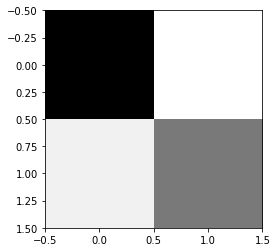

In [23]:
import matplotlib.pyplot as plt
plt.imshow(cm, cmap='binary', interpolation='None')
plt.show()